In [2]:
!pip install ta
!pip install bitfinex-tencars
!pip install pandas-ta
!pip install finta

  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=88b27b434b52647042089211a41f24ba7d708e0d90eb4c2cb87fa9282ae6c5e0
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta
     |████████████████████████████████| 115 kB 8.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=f13f27fe96c9c2085779118d6afd4ae061e4af1406c839a2df28159eab73f61c
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [7]:
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from finta import TA
import ta
import pandas_ta as pta
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [6]:
!pip install hvplot holoviews

     |████████████████████████████████| 3.1 MB 8.0 MB/s 


In [10]:
#important choose File BTCUSD_4h"
from google.colab import files
csv_file = files.upload()

Saving BTCUSD_4h.csv to BTCUSD_4h.csv


In [11]:
btc_df = pd.read_csv(
    Path("BTCUSD_4h.csv"),
    index_col = "Date", 
    parse_dates = True, 
    infer_datetime_format = True
)

In [20]:
#if you get an error ref "CLOSE" change to match column in data frame. you may need to change from upper to lower case.
test=btc_df["Close"]


In [21]:
import os
import holoviews as hv

os.environ['HV_DOC_HTML'] = 'true'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
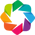

:Curve   [Date]   (Close)

In [23]:
hv.extension('bokeh')
test.hvplot()

In [24]:
#btc_df["Close"].hvplot()



In [25]:

signals_df = btc_df.copy()


short_window = 15
long_window = 50


signals_df["Short"] = TA.SMA(signals_df, short_window)
signals_df["Long"] = TA.SMA(signals_df, long_window)


signals_df.iloc[100:125, :]

Open    Close          High           Low        Volume         Short         Long
Date                                                                                                      
2018-01-17 16:00:00   9512.0  10483.0  10643.000000   9493.000000  21091.217332  11895.643765  13296.39313
2018-01-17 20:00:00  10480.0  11108.0  11450.000000  10351.000000  24765.890715  11717.577099  13224.97313
2018-01-18 00:00:00  11113.0  11214.0  11670.000000  10775.000000  19111.388632  11526.510432  13154.81313
2018-01-18 04:00:00  11217.0  10540.0  11456.000000  10515.000000  12891.019321  11305.110432  13077.11313
2018-01-18 08:00:00  10539.0  11462.0  11608.000000  10515.000000  11873.272205  11162.577099  13024.87313
2018-01-18 12:00:00  11463.0  11766.0  11904.000000  11346.000000  16975.340997  11087.324728  12978.63313
2018-01-18 16:00:00  11765.0  11641.0  11766.000000  11111.000000  11703.250287  11035.258061  12932.31313
2018-01-18 20:00:00  11641.0  11030.0  11849.000000  10805.000000  12650.753096  10967.524728  12866.19313
2018-01-19 00:00:00  11031.0  10908.0  11399.000000  10647.000000  10228.429995  10896.058061  12797.29313
2018-01-19 04:00:00  10907.0  11052.0  11400.000000  10762.000000   6900.804363  10881.191394  12720.33313
2018-01-19 08:00:00  11052.0  11569.0  11733.000000  10912.000000  10110.811707  10914.791394  12686.59313
2018-01-19 12:00:00  11569.0  11466.0  11900.000000  11348.000000   7548.381936  10968.058061  12644.83313
2018-01-19 16:00:00  11467.0  11200.0  11650.000000  11011.814453   8544.649924  10989.590501  12599.33313
2018-01-19 20:00:00  11199.0  11476.0  11498.354933  11105.000000   5215.486061  11094.753333  12549.67313
2018-01-20 00:00:00  11476.0  11701.0  11805.000000  11407.000000   5417.289749  11241.066667  12516.03313
2018-01-20 04:00:00  11700.0  12603.0  12746.000000  11534.000000  14548.986268  11382.400000  12503.03313
2018-01-20 08:00:00  12603.0  12295.0  12749.000000  12271.000000   7119.882698  11461.533333  12476.27313
2018-01-20 12:00:00  12297.0  12515.0  12699.000000  12251.000000   5412.992110  11548.266667  12454.05313
2018-01-20 16:00:00  12520.0  12736.0  13017.000000  12517.000000  10019.677176  11694.666667  12429.95313
2018-01-20 20:00:00  12738.0  12732.0  12950.000000  12583.000000   3785.238535  11779.333333  12412.87313
2018-01-21 00:00:00  12731.0  12464.0  12732.000000  12307.000000   6501.302502  11825.866667  12387.37313
2018-01-21 04:00:00  12461.0  11921.0  12488.000000  11663.000000  12548.194212  11844.533333  12349.91313
2018-01-21 08:00:00  11922.0  12119.0  12119.000000  11621.000000   7267.558094  11917.133333  12309.61313
2018-01-21 12:00:00  12119.0  11448.0  12223.000000  11411.392312   8355.901790  11953.133333  12251.79313
2018-01-21 16:00:00  11449.0  11442.0  11593.000000  11155.000000  10649.200887  11979.133333  12194.99313

In [26]:
signals_df["Signal"] = 0.0

signals_df["Signal"][short_window:] = np.where(
    signals_df["Short"][short_window:] > signals_df["Long"][short_window:], 1.0, 0.0
)


signals_df["Entry/Exit"] = signals_df["Signal"].diff()


signals_df.iloc[95:105, :]

Open         Close     High      Low        Volume         Short          Long  Signal  Entry/Exit
Date                                                                                                                           
2018-01-16 20:00:00  11275.000000  11065.000000  11460.0   9940.0  30861.368332  12931.252371  13770.135711     0.0         0.0
2018-01-17 00:00:00  11065.000000  10667.000000  11497.0  10200.0  19153.641200  12770.119038  13681.775711     0.0         0.0
2018-01-17 04:00:00  10667.000000  10877.013408  11244.0  10317.0  13165.265318  12610.586598  13601.175979     0.0         0.0
2018-01-17 08:00:00  10877.013408   9898.557510  10889.0   9633.0  26530.655198  12366.623765  13494.367130     0.0         0.0
2018-01-17 12:00:00   9898.000000   9506.300000  10479.0   9231.1  27540.146741  12103.310432  13382.053130     0.0         0.0
2018-01-17 16:00:00   9512.000000  10483.000000  10643.0   9493.0  21091.217332  11895.643765  13296.393130     0.0         0.0
2018-01-17 20:00:00  10480.000000  11108.000000  11450.0  10351.0  24765.890715  11717.577099  13224.973130     0.0         0.0
2018-01-18 00:00:00  11113.000000  11214.000000  11670.0  10775.0  19111.388632  11526.510432  13154.813130     0.0         0.0
2018-01-18 04:00:00  11217.000000  10540.000000  11456.0  10515.0  12891.019321  11305.110432  13077.113130     0.0         0.0
2018-01-18 08:00:00  10539.000000  11462.000000  11608.0  10515.0  11873.272205  11162.577099  13024.873130     0.0         0.0

In [27]:
entry = signals_df[signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)


exit = signals_df[signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)


security_close = signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

moving_avgs = signals_df[["Short", "Long"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)


entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [28]:
bb_signals_df = btc_df.copy()


bb_signals_df.head()

Open    Close     High           Low       Volume
Date                                                                     
2018-01-01 00:00:00  13769.0  13394.0  13788.0  13214.000000  5153.549576
2018-01-01 04:00:00  13393.0  13624.0  13893.0  13262.000000  3518.101640
2018-01-01 08:00:00  13619.0  13231.0  13751.0  13072.000000  5067.926401
2018-01-01 12:00:00  13234.0  13208.0  13290.0  12777.000000  6589.771767
2018-01-01 16:00:00  13208.0  13249.0  13289.0  12950.009534  4006.296466

In [29]:
bbands_df = TA.BBANDS(bb_signals_df)


bbands_df.iloc[25:35, :]

BB_UPPER  BB_MIDDLE      BB_LOWER
Date                                                      
2018-01-05 04:00:00  15844.829772   14609.60  13374.370228
2018-01-05 08:00:00  15999.567745   14749.15  13498.732255
2018-01-05 12:00:00  16083.544327   14884.40  13685.255673
2018-01-05 16:00:00  16246.560897   15030.30  13814.039103
2018-01-05 20:00:00  16512.879518   15190.35  13867.820482
2018-01-06 00:00:00  16725.709140   15278.40  13831.090860
2018-01-06 04:00:00  16888.135670   15367.50  13846.864330
2018-01-06 08:00:00  17033.702185   15451.30  13868.897815
2018-01-06 12:00:00  17181.550191   15518.25  13854.949809
2018-01-06 16:00:00  17332.835046   15613.85  13894.864954

In [30]:
bb_signals_df = pd.concat([bb_signals_df, bbands_df], axis=1)


bb_signals_df.iloc[50:60, :]

Open    Close     High      Low        Volume      BB_UPPER     BB_MIDDLE      BB_LOWER
Date                                                                                                           
2018-01-09 08:00:00  15124.0  14766.0  15290.0  14415.0   6510.316142  17563.205274  15948.267864  14333.330454
2018-01-09 12:00:00  14764.0  14679.0  14874.0  14122.0  12026.678108  17544.356468  15857.017864  14169.679260
2018-01-09 16:00:00  14678.0  14722.0  14998.0  14577.0   5563.566250  17496.929922  15767.167864  14037.405806
2018-01-09 20:00:00  14714.0  14425.0  14805.0  14153.0   6642.274169  17437.160918  15657.417864  13877.674810
2018-01-10 00:00:00  14426.0  14074.0  14479.0  13875.0   8848.490932  17357.853720  15523.317864  13688.782008
2018-01-10 04:00:00  14075.0  14078.0  14383.0  14001.0   6805.035924  17140.820107  15369.067864  13597.315621
2018-01-10 08:00:00  14083.0  13957.0  14084.0  13300.0  13022.654989  16989.297104  15230.767864  13472.238623
2018-01-10 12:00:00  13948.0  14336.0  14498.0  13510.0  13737.698522  16759.478051  15110.467864  13461.457677
2018-01-10 16:00:00  14336.0  14353.0  14682.0  14226.0   9062.849107  16519.296712  14997.767864  13476.239016
2018-01-10 20:00:00  14352.0  14900.0  14900.0  14230.0   5854.559283  16273.818383  14919.267864  13564.717345

In [31]:
security_close = bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)



bbands_plot = security_close * bb_upper * bb_middle * bb_lower
bbands_plot

:Overlay
   .Curve.I   :Curve   [Date]   (Close)
   .Curve.II  :Curve   [Date]   (BB_UPPER)
   .Curve.III :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV  :Curve   [Date]   (BB_LOWER)

In [32]:
bb_signals_df["Signal"] = 0.0


for index, row in bb_signals_df.iterrows():
    if row["Close"] < row["BB_LOWER"]:
        bb_signals_df.loc[index, "Signal"] = 1.0
    if row["Close"] > row["BB_UPPER"]:
        bb_signals_df.loc[index,"Signal"] = -1.0

bb_signals_df

Open         Close     High           Low       Volume      BB_UPPER     BB_MIDDLE      BB_LOWER  Signal
Date                                                                                                                                 
2018-01-01 00:00:00  13769.000000  13394.000000  13788.0  13214.000000  5153.549576           NaN           NaN           NaN     0.0
2018-01-01 04:00:00  13393.000000  13624.000000  13893.0  13262.000000  3518.101640           NaN           NaN           NaN     0.0
2018-01-01 08:00:00  13619.000000  13231.000000  13751.0  13072.000000  5067.926401           NaN           NaN           NaN     0.0
2018-01-01 12:00:00  13234.000000  13208.000000  13290.0  12777.000000  6589.771767           NaN           NaN           NaN     0.0
2018-01-01 16:00:00  13208.000000  13249.000000  13289.0  12950.009534  4006.296466           NaN           NaN           NaN     0.0
...                           ...           ...      ...           ...          ...           ...           ...           ...     ...
2021-12-31 04:00:00  47204.448895  47183.000000  47556.0  46844.000000   259.643247  49559.839401  47736.924005  45914.008609     0.0
2021-12-31 08:00:00  47181.000000  47980.000000  48650.0  47091.000000  1332.115910  49188.997666  47644.824005  46100.650344     0.0
2021-12-31 12:00:00  47994.726939  47973.260983  48142.0  47837.000000   363.746183  48950.914159  47582.737054  46214.559950     0.0
2021-12-31 16:00:00  47974.614172  45721.071520  48123.0  45695.000000  1247.237794  48790.194563  47407.940630  46025.686697     1.0
2021-12-31 20:00:00  45721.000000  46218.000000  46576.0  45664.143622   570.805857  48545.421866  47270.966625  45996.511385     0.0

[8766 rows x 9 columns]

In [33]:
entry = bb_signals_df[bb_signals_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)


exit = bb_signals_df[bb_signals_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)


security_close = bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)



bbands_plot = security_close * bb_upper * bb_middle * bb_lower * entry * exit
bbands_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (BB_UPPER)
   .Curve.III        :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV         :Curve   [Date]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [34]:
bb_signals_df["Signal"] = 0.0


trade_signal = 0


for index, row in bb_signals_df.iterrows():
    if (row["Close"] < row["BB_LOWER"]) and (trade_signal < 1):
        bb_signals_df.loc[index, "Signal"] = 1.0
        trade_signal += 1
        
    if (row["Close"] > row["BB_UPPER"]) and (trade_signal > 0):
        bb_signals_df.loc[index, "Signal"] = -1.0
        trade_signal = 0



bb_signals_df

Open         Close     High           Low       Volume      BB_UPPER     BB_MIDDLE      BB_LOWER  Signal
Date                                                                                                                                 
2018-01-01 00:00:00  13769.000000  13394.000000  13788.0  13214.000000  5153.549576           NaN           NaN           NaN     0.0
2018-01-01 04:00:00  13393.000000  13624.000000  13893.0  13262.000000  3518.101640           NaN           NaN           NaN     0.0
2018-01-01 08:00:00  13619.000000  13231.000000  13751.0  13072.000000  5067.926401           NaN           NaN           NaN     0.0
2018-01-01 12:00:00  13234.000000  13208.000000  13290.0  12777.000000  6589.771767           NaN           NaN           NaN     0.0
2018-01-01 16:00:00  13208.000000  13249.000000  13289.0  12950.009534  4006.296466           NaN           NaN           NaN     0.0
...                           ...           ...      ...           ...          ...           ...           ...           ...     ...
2021-12-31 04:00:00  47204.448895  47183.000000  47556.0  46844.000000   259.643247  49559.839401  47736.924005  45914.008609     0.0
2021-12-31 08:00:00  47181.000000  47980.000000  48650.0  47091.000000  1332.115910  49188.997666  47644.824005  46100.650344     0.0
2021-12-31 12:00:00  47994.726939  47973.260983  48142.0  47837.000000   363.746183  48950.914159  47582.737054  46214.559950     0.0
2021-12-31 16:00:00  47974.614172  45721.071520  48123.0  45695.000000  1247.237794  48790.194563  47407.940630  46025.686697     0.0
2021-12-31 20:00:00  45721.000000  46218.000000  46576.0  45664.143622   570.805857  48545.421866  47270.966625  45996.511385     0.0

[8766 rows x 9 columns]

In [35]:
entry = bb_signals_df[bb_signals_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)


exit = bb_signals_df[bb_signals_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

security_close = bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)



bbands_plot = security_close * bb_upper * bb_middle * bb_lower * entry * exit
bbands_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (BB_UPPER)
   .Curve.III        :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV         :Curve   [Date]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [36]:
summary_ave_data = btc_df.copy()
summary_ave_data['average'] = summary_ave_data.mean(numeric_only=True, axis=1)
summary_ave_data

Open         Close     High           Low       Volume       average
Date                                                                                             
2018-01-01 00:00:00  13769.000000  13394.000000  13788.0  13214.000000  5153.549576  11863.709915
2018-01-01 04:00:00  13393.000000  13624.000000  13893.0  13262.000000  3518.101640  11538.020328
2018-01-01 08:00:00  13619.000000  13231.000000  13751.0  13072.000000  5067.926401  11748.185280
2018-01-01 12:00:00  13234.000000  13208.000000  13290.0  12777.000000  6589.771767  11819.754353
2018-01-01 16:00:00  13208.000000  13249.000000  13289.0  12950.009534  4006.296466  11340.461200
...                           ...           ...      ...           ...          ...           ...
2021-12-31 04:00:00  47204.448895  47183.000000  47556.0  46844.000000   259.643247  37809.418428
2021-12-31 08:00:00  47181.000000  47980.000000  48650.0  47091.000000  1332.115910  38446.823182
2021-12-31 12:00:00  47994.726939  47973.260983  48142.0  47837.000000   363.746183  38462.146821
2021-12-31 16:00:00  47974.614172  45721.071520  48123.0  45695.000000  1247.237794  37752.184697
2021-12-31 20:00:00  45721.000000  46218.000000  46576.0  45664.143622   570.805857  36949.989896

[8766 rows x 6 columns]

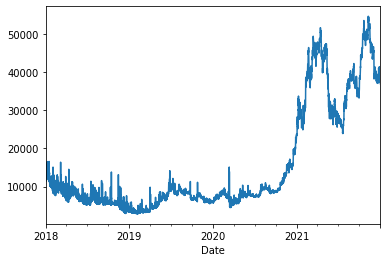

In [37]:
summary_ave_data["average"].plot()

In [38]:

signals_df = summary_ave_data.loc[:, ["average"]]


signals_df["Actual Returns"] = ( signals_df["average"].pct_change())
signals_df["Actual Returns"].head()

Date
2018-01-01 00:00:00         NaN
2018-01-01 04:00:00   -0.027453
2018-01-01 08:00:00    0.018215
2018-01-01 12:00:00    0.006092
2018-01-01 16:00:00   -0.040550
Name: Actual Returns, dtype: float64

In [39]:
signals_df = signals_df.dropna()

signals_df.head()

average  Actual Returns
Date                                             
2018-01-01 04:00:00  11538.020328       -0.027453
2018-01-01 08:00:00  11748.185280        0.018215
2018-01-01 12:00:00  11819.754353        0.006092
2018-01-01 16:00:00  11340.461200       -0.040550
2018-01-01 20:00:00  11753.059692        0.036383

In [40]:
signals_df["Signal"] = 0.0


signals_df.loc[(signals_df["Actual Returns"] >= 0), "Signal"] = 1


signals_df.loc[(signals_df["Actual Returns"] < 0), "Signal"] = -1

In [41]:
annualized_volatility = round(signals_df["Actual Returns"].std() * np.sqrt(365) * 100, 2)


print("Annualized Volatility:", annualized_volatility, "%")

Annualized Volatility: 167.2 %


In [42]:
signals_df["Strategy Returns"] = signals_df["Actual Returns"] * signals_df["Signal"].shift()

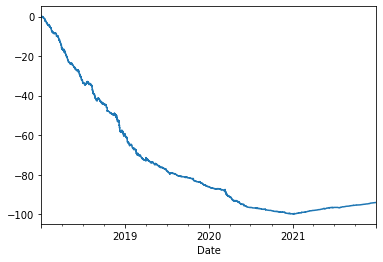

In [43]:
strategy_returns = signals_df["Strategy Returns"].cumsum()


strategy_returns.plot()

In [44]:
annualized_return = signals_df["Strategy Returns"].mean() * 365 
annualized_std = signals_df["Strategy Returns"].std() * np.sqrt(365)
sharpe_ratio = round(annualized_return/annualized_std, 3)


print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: -2.359


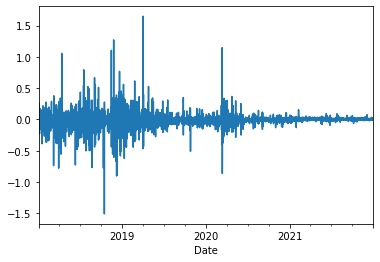

In [45]:
signals_df["Strategy Returns"].plot()

In [46]:
weekly_returns = signals_df["Strategy Returns"].groupby(
        by=[signals_df.index.isocalendar().year,
            signals_df.index.isocalendar().week
        ]
    ).sum()

  
weekly_returns

year  week
2018  1      -0.311121
      2      -0.933489
      3      -1.366427
      4      -1.573049
      5      -0.562321
      6      -0.972683
      7      -2.009715
      8      -0.824677
      9       0.080630
      10     -1.465885
      11     -2.056497
      12     -1.596414
      13     -2.878016
      14     -0.326100
      15     -1.779894
      16     -2.087279
      17     -2.363668
      18     -0.807761
      19      0.077274
      20     -1.339359
      21     -1.177503
      22     -1.065468
      23     -0.756130
      24     -1.204395
      25     -2.776753
      26     -1.652162
      27     -0.701653
      28      0.411121
      29      0.647783
      30     -0.937801
      31     -0.230664
      32     -2.919874
      33     -1.867446
      34     -2.311634
      35     -0.353513
      36      0.080083
      37     -1.215698
      38     -0.952419
      39     -0.335036
      40     -0.018705
      41     -1.629368
      42     -2.015021
      43     -0.646944


In [47]:
weekly_returns.describe()

count    209.000000
mean      -0.450041
std        0.759997
min       -5.096517
25%       -0.701653
50%       -0.198839
75%        0.056202
max        0.725187
Name: Strategy Returns, dtype: float64

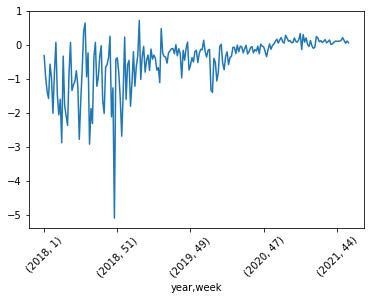

In [48]:
weekly_returns.plot(rot=45)

In [49]:
btc_df["actual_returns"] = btc_df["Close"].pct_change()

In [50]:
btc_df = btc_df.dropna()


display(btc_df.head())
display(btc_df.tail())

Open    Close     High           Low       Volume  actual_returns
Date                                                                                     
2018-01-01 04:00:00  13393.0  13624.0  13893.0  13262.000000  3518.101640        0.017172
2018-01-01 08:00:00  13619.0  13231.0  13751.0  13072.000000  5067.926401       -0.028846
2018-01-01 12:00:00  13234.0  13208.0  13290.0  12777.000000  6589.771767       -0.001738
2018-01-01 16:00:00  13208.0  13249.0  13289.0  12950.009534  4006.296466        0.003104
2018-01-01 20:00:00  13249.0  13376.0  13662.0  13249.000000  5229.298458        0.009586

Open         Close     High           Low       Volume  actual_returns
Date                                                                                               
2021-12-31 04:00:00  47204.448895  47183.000000  47556.0  46844.000000   259.643247       -0.000445
2021-12-31 08:00:00  47181.000000  47980.000000  48650.0  47091.000000  1332.115910        0.016892
2021-12-31 12:00:00  47994.726939  47973.260983  48142.0  47837.000000   363.746183       -0.000140
2021-12-31 16:00:00  47974.614172  45721.071520  48123.0  45695.000000  1247.237794       -0.046947
2021-12-31 20:00:00  45721.000000  46218.000000  46576.0  45664.143622   570.805857        0.010869

In [51]:
short_window = 4
btc_df['sma_fast'] = TA.SMA(btc_df, 4)

In [52]:
long_window = 100
btc_df['sma_slow'] = btc_df['Close'].rolling(window=long_window).mean()

In [53]:
btc_df["ssma"] = TA.SSMA(btc_df)
btc_df["ema"] = TA.EMA(btc_df, 50)
btc_df["dema"] = TA.DEMA(btc_df)
btc_df["tema"] = TA.TEMA(btc_df)
btc_df["trima"] = TA.TRIMA(btc_df)

In [54]:
btc_df = btc_df.dropna()

In [55]:
X = btc_df[['sma_fast', 'sma_slow', 'ssma', 'ema', 'dema', 'tema', 'trima']].shift().dropna().copy()
X

sma_fast      sma_slow          ssma           ema          dema          tema         trima
Date                                                                                                                 
2018-01-17 20:00:00  10191.217729  14247.730138  11653.741599  13025.233845   9937.935076   9778.656241  13338.219035
2018-01-18 00:00:00  10248.964377  14222.570138  11593.103230  12948.702165  10207.749469  10260.376508  13238.434024
2018-01-18 04:00:00  10577.825000  14202.400138  11550.980394  12879.505323  10454.600703  10648.582193  13132.275557
2018-01-18 08:00:00  10836.250000  14175.720138  11438.648634  12786.245894  10400.321464  10583.442363  13016.765237
2018-01-18 12:00:00  11081.000000  14157.850138  11441.243243  12733.491776  10703.089893  11001.368634  12894.603683
...                           ...           ...           ...           ...           ...           ...           ...
2021-12-31 04:00:00  47265.500000  48521.485687  47760.391143  48640.368245  47004.097365  47219.948294  49212.121651
2021-12-31 08:00:00  47275.750000  48524.579075  47696.236572  48583.216549  47015.877963  47221.983114  49049.369535
2021-12-31 12:00:00  47380.750000  48535.589075  47727.765841  48559.560998  47317.022428  47614.502062  48887.373592
2021-12-31 16:00:00  47585.065246  48531.331685  47755.043079  48536.568841  47533.847941  47859.714257  48727.647095
2021-12-31 20:00:00  47214.333126  48505.752400  47529.046239  48426.157181  46879.404585  46908.431025  48571.741807

[8665 rows x 7 columns]

In [56]:
btc_df['signal'] = 0.0

In [57]:
btc_df.loc[(btc_df['actual_returns'] >= 0), 'signal'] = 1

In [58]:
btc_df.loc[(btc_df['actual_returns'] < 0), 'signal'] = -1

In [59]:
btc_df.tail()

Open         Close     High           Low       Volume  actual_returns      sma_fast      sma_slow          ssma           ema          dema          tema         trima  signal
Date                                                                                                                                                                                                         
2021-12-31 04:00:00  47204.448895  47183.000000  47556.0  46844.000000   259.643247       -0.000445  47275.750000  48524.579075  47696.236572  48583.216549  47015.877963  47221.983114  49049.369535    -1.0
2021-12-31 08:00:00  47181.000000  47980.000000  48650.0  47091.000000  1332.115910        0.016892  47380.750000  48535.589075  47727.765841  48559.560998  47317.022428  47614.502062  48887.373592     1.0
2021-12-31 12:00:00  47994.726939  47973.260983  48142.0  47837.000000   363.746183       -0.000140  47585.065246  48531.331685  47755.043079  48536.568841  47533.847941  47859.714257  48727.647095    -1.0
2021-12-31 16:00:00  47974.614172  45721.071520  48123.0  45695.000000  1247.237794       -0.046947  47214.333126  48505.752400  47529.046239  48426.157181  46879.404585  46908.431025  48571.741807    -1.0
2021-12-31 20:00:00  45721.000000  46218.000000  46576.0  45664.143622   570.805857        0.010869  46973.083126  48485.612400  47383.374435  48339.562782  46593.121768  46541.318566  48420.593446     1.0

In [60]:
y = btc_df['signal']

In [61]:
training_begin = X.index.min()
print(training_begin)

2018-01-17 20:00:00


In [62]:
training_end = X.index.min() + DateOffset(months=6)
print(training_end)

2018-07-17 20:00:00


In [63]:
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

In [64]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [65]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [67]:
model = SVC()
 
model = model.fit(X_resampled, y_resampled)

In [68]:
training_signal_predictions = model.predict(X_resampled)

In [69]:
training_report = classification_report(y_resampled, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.67      0.59       545
         1.0       0.55      0.40      0.47       545

    accuracy                           0.54      1090
   macro avg       0.54      0.54      0.53      1090
weighted avg       0.54      0.54      0.53      1090



In [70]:
testing_signal_predictions = model.predict(X_test_scaled)

In [71]:
training_report = classification_report(y_test, testing_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.33      0.40      3678
         1.0       0.52      0.68      0.59      3901

    accuracy                           0.51      7579
   macro avg       0.51      0.51      0.49      7579
weighted avg       0.51      0.51      0.50      7579



In [72]:
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df['predicted_returns'] = testing_signal_predictions
predictions_df['predicted_returns'].value_counts()

 1.0    5120
-1.0    2459
Name: predicted_returns, dtype: int64

In [73]:
predictions_df['actual_returns'] = btc_df['actual_returns']
predictions_df['trading_algorithm_returns'] = predictions_df['actual_returns'] * predictions_df['predicted_returns']
predictions_df

predicted_returns  actual_returns  trading_algorithm_returns
Date                                                                             
2018-07-17 20:00:00               -1.0        0.002149                  -0.002149
2018-07-18 00:00:00               -1.0        0.019563                  -0.019563
2018-07-18 04:00:00               -1.0       -0.003698                   0.003698
2018-07-18 08:00:00               -1.0       -0.002031                   0.002031
2018-07-18 12:00:00               -1.0        0.000633                  -0.000633
...                                ...             ...                        ...
2021-12-31 04:00:00                1.0       -0.000445                  -0.000445
2021-12-31 08:00:00                1.0        0.016892                   0.016892
2021-12-31 12:00:00                1.0       -0.000140                  -0.000140
2021-12-31 16:00:00                1.0       -0.046947                  -0.046947
2021-12-31 20:00:00                1.0        0.010869                   0.010869

[7579 rows x 3 columns]

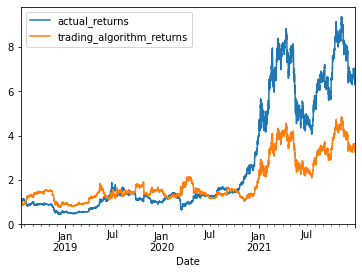

In [74]:
(1 + predictions_df[['actual_returns', 'trading_algorithm_returns']]).cumprod().plot()

In [75]:
def applyindicators(btc_df):
    btc_df['SMA_200'] = btc_df.Close.rolling(200).mean()
    btc_df['SMA_20'] = btc_df.Close.rolling(20).mean()
    btc_df['stddev'] = btc_df.Close.rolling(20).std()
    btc_df['Upper'] = btc_df.SMA_20+2.5*btc_df.stddev
    btc_df['Lower'] = btc_df.SMA_20-2.5*btc_df.stddev
    btc_df['rsi'] = ta.momentum.rsi(btc_df.Close,2)

In [76]:
applyindicators(btc_df)

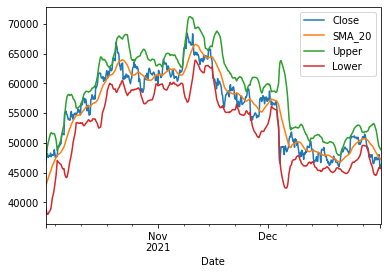

In [77]:
btc_df.tail(550)[['Close','SMA_20','Upper','Lower']].plot()

In [78]:
def conditions(btc_df):

    btc_df['Buy'] =np.where((btc_df.Close> btc_df.SMA_200) & (btc_df.Close < btc_df.Lower) & (0.97 *btc_df.Close >= btc_df.Low.shift(-1)), 1, 0)
    btc_df['Sell'] = np.where((btc_df.rsi > 50), 1, 0)

    btc_df['Buyprice'] = 0.97 * btc_df.Close
    btc_df['Sellprice'] = btc_df.Open.shift(-1)

In [79]:
conditions(btc_df)

In [80]:
def matchtrades(btc_df):
    Buy_Sells = btc_df[(btc_df.Buy == 1) | (btc_df.Sell == 1)]
    matched = Buy_Sells[(Buy_Sells.Buy.diff() == 1) | (Buy_Sells.Sell.diff() == 1)]
    return matched

In [81]:
trades = matchtrades(btc_df)

In [82]:
profit = (trades.Sellprice.shift(-1) - trades.Buyprice) / trades.Buyprice

In [83]:
profit = profit[::2]
profit

Date
2018-07-31 08:00:00   -0.018112
2018-09-05 16:00:00   -0.035424
2019-06-03 20:00:00   -0.004738
2019-07-14 08:00:00   -0.000005
2019-11-08 08:00:00    0.009034
2020-06-11 12:00:00    0.022835
2021-01-11 00:00:00    0.027272
2021-01-21 08:00:00    0.041276
2021-02-23 04:00:00    0.017276
dtype: float64

In [84]:
shortema = btc_df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
longema = btc_df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
macd = shortema - longema
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
macd_h = macd - macd_s
btc_df['macd'] = btc_df.index.map(macd)
btc_df['macd_h'] = btc_df.index.map(macd_h)
btc_df['macd_s'] = btc_df.index.map(macd_s)


In [85]:
pd.set_option("display.max_columns", None)
btc_df

Open         Close     High           Low        Volume  actual_returns      sma_fast      sma_slow          ssma           ema          dema          tema         trima  signal       SMA_200        SMA_20      stddev         Upper         Lower         rsi  Buy  Sell      Buyprice     Sellprice        macd      macd_h      macd_s
Date                                                                                                                                                                                                                                                                                                                                                                     
2018-01-17 16:00:00   9512.000000  10483.000000  10643.0   9493.000000  21091.217332        0.102742  10191.217729  14247.730138  11653.741599  13025.233845   9937.935076   9778.656241  13338.219035     1.0           NaN           NaN         NaN           NaN           NaN         NaN    0     0  10168.510000  10480.000000         NaN         NaN         NaN
2018-01-17 20:00:00  10480.000000  11108.000000  11450.0  10351.000000  24765.890715        0.059620  10248.964377  14222.570138  11593.103230  12948.702165  10207.749469  10260.376508  13238.434024     1.0           NaN           NaN         NaN           NaN           NaN  100.000000    0     1  10774.760000  11113.000000         NaN         NaN         NaN
2018-01-18 00:00:00  11113.000000  11214.000000  11670.0  10775.000000  19111.388632        0.009543  10577.825000  14202.400138  11550.980394  12879.505323  10454.600703  10648.582193  13132.275557     1.0           NaN           NaN         NaN           NaN           NaN  100.000000    0     1  10877.580000  11217.000000         NaN         NaN         NaN
2018-01-18 04:00:00  11217.000000  10540.000000  11456.0  10515.000000  12891.019321       -0.060103  10836.250000  14175.720138  11438.648634  12786.245894  10400.321464  10583.442363  13016.765237    -1.0           NaN           NaN         NaN           NaN           NaN   23.690914    0     0  10223.800000  10539.000000         NaN         NaN         NaN
2018-01-18 08:00:00  10539.000000  11462.000000  11608.0  10515.000000  11873.272205        0.087476  11081.000000  14157.850138  11441.243243  12733.491776  10703.089893  11001.368634  12894.603683     1.0           NaN           NaN         NaN           NaN           NaN   75.286461    0     1  11118.140000  11463.000000         NaN         NaN         NaN
...                           ...           ...      ...           ...           ...             ...           ...           ...           ...           ...           ...           ...           ...     ...           ...           ...         ...           ...           ...         ...  ...   ...           ...           ...         ...         ...         ...
2021-12-31 04:00:00  47204.448895  47183.000000  47556.0  46844.000000    259.643247       -0.000445  47275.750000  48524.579075  47696.236572  48583.216549  47015.877963  47221.983114  49049.369535    -1.0  50126.232184  47736.924005  911.457698  50015.568250  45458.279761   40.209361    0     0  45767.510000  47181.000000 -670.661034   28.206854 -698.867889
2021-12-31 08:00:00  47181.000000  47980.000000  48650.0  47091.000000   1332.115910        0.016892  47380.750000  48535.589075  47727.765841  48559.560998  47317.022428  47614.502062  48887.373592     1.0  50095.182647  47644.824005  772.086830  49575.041081  45714.606929   91.823213    0     1  46540.600000  47994.726939 -577.416396   97.161194 -674.577590
2021-12-31 12:00:00  47994.726939  47973.260983  48142.0  47837.000000    363.746183       -0.000140  47585.065246  48531.331685  47755.043079  48536.568841  47533.847941  47859.714257  48727.647095    -1.0  50062.103952  47582.737054  684.088552  49292.958435  45872.515673   90.502040    0     1  46534.063153  47974.614172 -498.318822  141.007015 -639.325836
2021-12-31 16:00:00  47974.614172  45721.071520

In [86]:
btc_df.ta.macd(close='Close', fast=12, slow=26, append=True)

MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
Date                                                           
2018-01-17 16:00:00           NaN            NaN            NaN
2018-01-17 20:00:00           NaN            NaN            NaN
2018-01-18 00:00:00           NaN            NaN            NaN
2018-01-18 04:00:00           NaN            NaN            NaN
2018-01-18 08:00:00           NaN            NaN            NaN
...                           ...            ...            ...
2021-12-31 04:00:00   -670.661034      28.206854    -698.867889
2021-12-31 08:00:00   -577.416396      97.161194    -674.577590
2021-12-31 12:00:00   -498.318822     141.007015    -639.325836
2021-12-31 16:00:00   -610.330778      23.196047    -633.526825
2021-12-31 20:00:00   -651.493079     -14.373003    -637.120075

[8666 rows x 3 columns]

In [87]:
btc_df.columns = [x.lower() for x in btc_df.columns]

In [88]:
fig = make_subplots(rows=2, cols=1)

In [89]:
fig.append_trace(
    go.Scatter(
        x=btc_df.index,
        y=btc_df['open'],
        line=dict(color='#ff9900', width=1),
        name='open',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Candlestick(
        x=btc_df.index,
        open=btc_df['open'],
        high=btc_df['high'],
        low=btc_df['low'],
        close=btc_df['close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=btc_df.index,
        y=btc_df['macd_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        legendgroup='2',
    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=btc_df.index,
        y=btc_df['macds_12_26_9'],
        line=dict(color='#000000', width=2),
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)

colors = np.where(btc_df['macdh_12_26_9'] < 0, '#000', '#ff9900')

fig.append_trace(
    go.Bar(
        x=btc_df.index,
        y=btc_df['macdh_12_26_9'],
        name='histogram',
        marker_color=colors,
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

fig.update_layout(layout)
fig.show()